<a href="https://colab.research.google.com/github/cm180697/Portfolio/blob/main/ANOVA_1_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import scipy.stats as stats

# Load the Iris dataset into a pandas dataframe
data = pd.read_csv('iris.csv')

# Subset the data to only include sepal width and species
subset_data = data[['sepal_width', 'species']]

# Check for normality within each group using the Shapiro-Wilk test
print("Normality test using Shapiro-Wilk test:")
for species in set(subset_data['species']):
    statistic, pvalue = stats.shapiro(subset_data[subset_data['species']==species]['sepal_width'])
    normality = "Normal" if pvalue >= 0.05 else "Non-normal"
    print(f'{species}:\n\tShapiro-Wilk test statistic = {statistic:.3f}, p-value = {pvalue:.3f} ({normality})')

# Check for equality of variances using Levene's test
test_statistic, p_value = stats.levene(*[subset_data[subset_data['species']==species]['sepal_width'] for species in set(subset_data['species'])])
variance = "Equal" if p_value >= 0.05 else "Unequal"
print(f'\nLevene\'s test:\n\ttest statistic = {test_statistic:.3f}, p-value = {p_value:.3f} ({variance} variances)')

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[subset_data[subset_data['species']==species]['sepal_width'] for species in set(subset_data['species'])])
print(f'\nOne-way ANOVA:\n\tF-statistic = {f_statistic:.3f}, p-value = {p_value:.3f}')


Normality test using Shapiro-Wilk test:
versicolor:
	Shapiro-Wilk test statistic = 0.974, p-value = 0.338 (Normal)
setosa:
	Shapiro-Wilk test statistic = 0.969, p-value = 0.205 (Normal)
virginica:
	Shapiro-Wilk test statistic = 0.967, p-value = 0.181 (Normal)

Levene's test:
	test statistic = 0.648, p-value = 0.525 (Equal variances)

One-way ANOVA:
	F-statistic = 47.364, p-value = 0.000


Text(0.5, 1.0, 'Mean Sepal Width by Species')

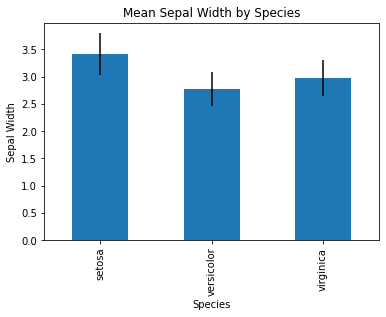

In [22]:
import matplotlib.pyplot as plt

# Calculate the means and standard deviations for each group
means = data.groupby('species')['sepal_width'].mean()
stds = data.groupby('species')['sepal_width'].std()

# Create a bar plot of the means with error bars showing +/- 1 standard deviation
fig, ax = plt.subplots()
means.plot.bar(yerr=stds, ax=ax)

# Add axis labels and a title
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Width')
ax.set_title('Mean Sepal Width by Species')


<AxesSubplot:xlabel='species', ylabel='sepal_width'>

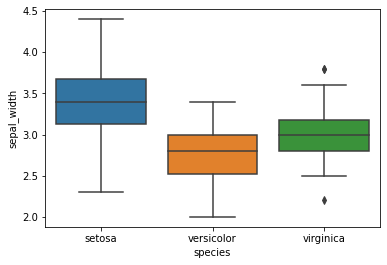

In [25]:
import seaborn as sns

sns.boxplot(x='species', y='sepal_width', data=data)


In [23]:
import statsmodels.stats.multicomp as mc

# Perform Tukey's HSD test
tukey_results = mc.pairwise_tukeyhsd(endog=data['sepal_width'], groups=data['species'], alpha=0.05)

# Print the results
print(tukey_results)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.648  0.001 -0.8092 -0.4868   True
    setosa  virginica   -0.444  0.001 -0.6052 -0.2828   True
versicolor  virginica    0.204 0.0089  0.0428  0.3652   True
------------------------------------------------------------


In [28]:
# Calculate effect size
mean_diff = data.groupby('species')['sepal_width'].mean().diff().abs().iloc[-1]
pooled_std = data.groupby('species')['sepal_width'].apply(pd.Series.std, ddof=1).mean()
effect_size = mean_diff / pooled_std

print(f"\nEffect size (Cohen's d): {effect_size:.3f}")



Effect size (Cohen's d): 0.602
